# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    (optimize for number of days)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
# this is really SMAs
periods = range(20, 120, 10)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, period=8, sma=int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

20 30 40 50 60 70 80 90 100 110 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,20,30,40,50,60,70,80,90,100,110
annual_return_rate,7.92,8.90,8.46,8.59,8.59,8.25,8.44,7.76,7.58,7.74
max_closed_out_drawdown,-31.19,-31.18,-31.19,-31.11,-31.11,-31.13,-31.12,-31.11,-31.18,-31.15
drawdown_annualized_return,-3.94,-3.50,-3.69,-3.62,-3.62,-3.77,-3.69,-4.01,-4.11,-4.02
drawdown_recovery,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
best_month,15.79,15.79,15.80,13.67,13.67,13.68,13.67,13.66,13.71,13.69
worst_month,-30.73,-30.72,-30.73,-30.65,-30.65,-30.67,-30.65,-30.65,-30.72,-30.69
sharpe_ratio,0.84,0.92,0.88,0.91,0.91,0.89,0.91,0.84,0.83,0.85
sortino_ratio,0.73,0.82,0.78,0.81,0.81,0.78,0.79,0.73,0.72,0.73
monthly_std,2.50,2.53,2.51,2.44,2.44,2.42,2.43,2.45,2.42,2.39
pct_time_in_market,32.25,32.82,32.79,32.43,32.43,32.01,32.12,32.16,31.81,31.30


Bar graphs

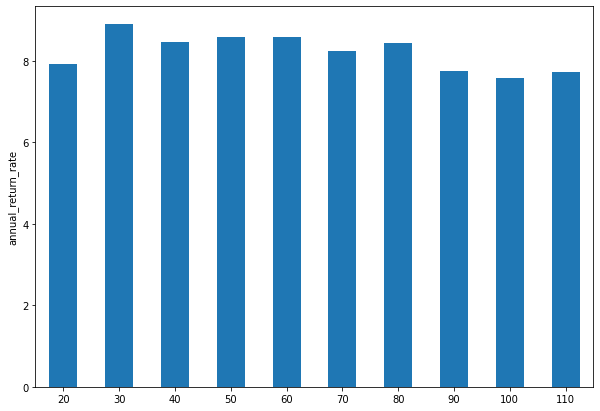

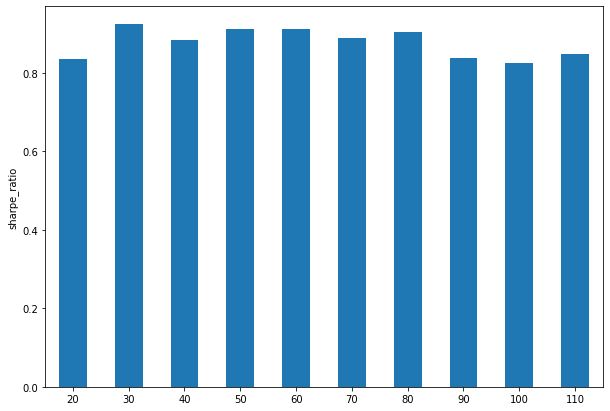

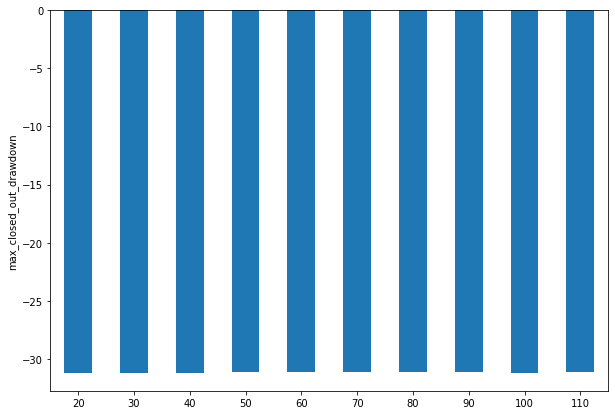

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-06-22 00:00:00 SELL 215 SPY @ 310.62


Equity curve

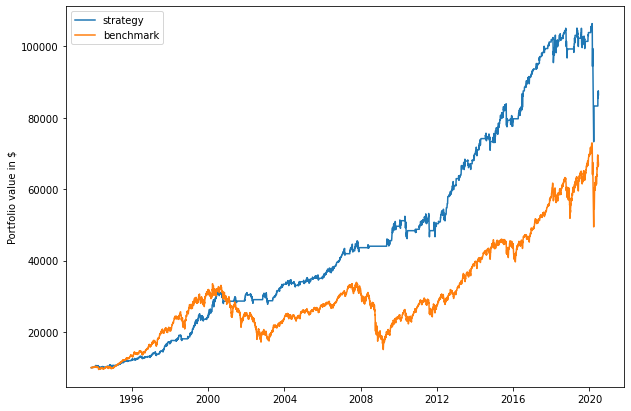

In [9]:
pf.plot_equity_curve(strategies['80'].dbal, benchmark=benchmark.dbal)